# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Metrics to Evaluate a Classifier

In the previous notebook, we made some forecasts using a Decision Tree Classifier model. However, classifier accuracy is sensitive to the distribution of the data, and can be biased if it is imbalanced (for example, if one class is more common than the other). Hence, you must also use additional metrics, such as precision, recall, or F1-score, which are less sensitive to the class distribution to evaluate the classifier model.

This notebook is structured as follows:

1. [Import Libraries](#lib)
1. [Read the Data](#read)
1. [Confusion Matrix](#cm)
1. [Classification Report](#cr)

<a id='lib'></a>
## Import Libraries

In [1]:
# For data manipulation
import pandas as pd

# Libraries for evaluating the model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Libraries for plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

<a id='read'></a> 
## Read the Data
To evaluate the performance, we will read the ML model's predicted values and the expected target values. These can be obtained by reading the data in CSV files `spy_predicted_2018_2022` and `spy_expected_target_2018_2022` respectively. These files were generated and stored as CSVs in the previous notebook and are also available in the zip file of the unit 'Python Codes and Data' in the 'Course Summary' section.

In [2]:
# Read the model predicted target values
y_pred = pd.read_csv(
    "../data_modules/spy_predicted_2018_2022.csv", index_col=0, parse_dates=True)

# Read the target values of the testing dataset
y_test = pd.read_csv(
    "../data_modules/spy_expected_target_2018_2022.csv", index_col=0, parse_dates=True)
y_test.tail()

,target
Date,
2022-06-23,1
2022-06-24,0
2022-06-27,0
2022-06-28,0
2022-06-29,0


<a id='cm'></a>
## Confusion Matrix

The `confusion_matrix` function is a useful tool for evaluating the performance of a classification model. It takes in the true labels `y_test` and the predicted labels `clf.predict(X_test)` and returns a matrix that shows the number of correct and incorrect predictions made by the model.

Syntax:
```python
confusion_matrix(y_test, y_pred)
```

Parameters:
1. **y_test:** The observed target from the training dataset.
2. **y_pred:** The predicted target from the model.

Returns:
A `numpy` array of the confusion matrix.

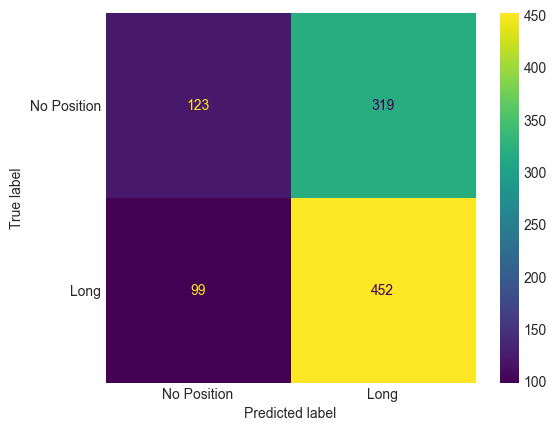

In [3]:
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Initialise the ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=['No Position', 'Long'])

# Plot the confusion matrix
cm_display.plot()
plt.grid()
plt.show()

The confusion matrix as seen above gives us the following information:

1. True Positive: 452 correct predictions for taking a long position.
2. False Positive: 319 incorrect predictions for taking a long position when the expected action was no position.
3. True Negative: 123 correct predictions for taking no position.
4. False Negative: 99 incorrect predictions for taking no position when the expected action was to take a long position.

<a id='cr'></a> 
## Classification Report

The `scikit-learn` library has a function called `classification_report` which provides measures like precision, recall, f1-score and support for each class. Precision and recall indicate the quality of our predictions. The f1-score gives the harmonic mean of precision and recall. The support values are used as weights to compute the average values of precision, recall and f1-score.

Let us look at the formulae for the different performance metrics.

$$
\text{Recall} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of the actual outcomes}}\\[1cm]
\text{Precision} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of said outcomes predicted by the algorithm}}\\[1cm]
\text{f1-score} = \frac{2 * \text{(precision * recall)}}{\text{(precision + recall)}}\\[1cm]
$$

An f1-score above 0.5 is usually considered a good number.

You can simply use the following syntax to print the classification report.

Syntax:
```python
classification_report(y_test, y_pred)
```

Parameters:
1. **y_test:** The observed target from the training dataset.
2. **y_pred:** The predicted target from the model.

Returns: <br>
Classification Report containing precision, recall, f1-score and support.

In [4]:
# Classification report
classification_report_data = classification_report(y_test, y_pred)

# Print the classification report
print(classification_report_data)

              precision    recall  f1-score   support

           0       0.55      0.28      0.37       442
           1       0.59      0.82      0.68       551

    accuracy                           0.58       993
   macro avg       0.57      0.55      0.53       993
weighted avg       0.57      0.58      0.54       993



In the left-most column, you can see the values 0 and 1. These represent the position as follows:

1. `0` means no position
1. `1` means a long position

So from the table, you can say that the ML Model has an overall accuracy score of 0.58. Apart from accuracy, you can identify the precision, recall, and f1-score for the signals as well. 

Support is the number of actual occurrences of the class in the specified dataset. Thus, in the total signal, there were 442 occurrences of `0`, and 551 occurrences of the `1` signal.

The accuracy score tells you how the ML model performed in total. 

What are macro and weighted averages?

Sometimes, the signal values might not be balanced. There could be instances where the number of occurrences for `0` is barely 50 while the number of occurrences for `1` is 500. In this scenario, the weighted average will give more weightage to the signal `1`. In contrast, the macro average takes a simple average of all the occurrences.

<a id='conclusion'></a>
## Conclusion

Thus, the machine learning model's performance can be analysed using the metrics you have learned in this notebook. Now let's backtest this model and see how it would have performed!<br><br>